In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import plotly.express as px

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

import re
import scanpy as sc

from adjustText import adjust_text  

import warnings

import anndata as ad

from matplotlib_venn import venn2

# Data Import 

In [2]:
# Load data
df = pd.read_csv("./Data/report.pg_matrix.tsv", sep='\t', index_col=2) 
df

,Protein.Group,Protein.Names,First.Protein.Description,X:\Astral-2\2025\Meyer_AstralPDC_2025\Cameron\20250120\blank3.raw,X:\Astral-2\2025\Meyer_AstralPDC_2025\Cameron\20250120\blank2.raw,X:\Astral-2\2025\Meyer_AstralPDC_2025\Cameron\20250120\blank1.raw,X:\Astral-2\2025\Meyer_AstralPDC_2025\Cameron\20250120\P2_A5N4_5.raw,X:\Astral-2\2025\Meyer_AstralPDC_2025\Cameron\20250120\P2_N5A4_5.raw,X:\Astral-2\2025\Meyer_AstralPDC_2025\Cameron\20250120\P2_N5A2_5.raw,X:\Astral-2\2025\Meyer_AstralPDC_2025\Cameron\20250120\P2_N5A3_5.raw,...,X:\Astral-2\2025\Meyer_AstralPDC_2025\Cameron\20250120\P1_N8_1.raw,X:\Astral-2\2025\Meyer_AstralPDC_2025\Cameron\20250120\P1_N5A3_1.raw,X:\Astral-2\2025\Meyer_AstralPDC_2025\Cameron\20250120\P1_N9_1.raw,X:\Astral-2\2025\Meyer_AstralPDC_2025\Cameron\20250120\P1_N5A2_1.raw,X:\Astral-2\2025\Meyer_AstralPDC_2025\Cameron\20250120\P1_A8_1.raw,X:\Astral-2\2025\Meyer_AstralPDC_2025\Cameron\20250120\P1_R3_1.raw,X:\Astral-2\2025\Meyer_AstralPDC_2025\Cameron\20250120\P1_BKF3_1.raw,X:\Astral-2\2025\Meyer_AstralPDC_2025\Cameron\20250120\new_blank3.raw,X:\Astral-2\2025\Meyer_AstralPDC_2025\Cameron\20250120\new_blank2.raw,X:\Astral-2\2025\Meyer_AstralPDC_2025\Cameron\20250120\new_blank.raw
Genes,,,,,,,,,,,,,,,,,,,,,
TADA2A,A0A024R0Y4,A0A024R0Y4_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,66168.9,392447.0,52230.6,NaN,NaN,NaN,NaN
SEPTIN7,A0A024RA87,A0A024RA87_HUMAN,NaN,NaN,NaN,NaN,1440080.00,NaN,1985810.00,2978830.0,...,NaN,1769360.00,2275480.0,1772260.0,2245500.0,1780110.0,5855300.0,NaN,NaN,NaN
NUDT4;NUDT4B,A0A024RBG1;Q9NZJ9-2,NUD4B_HUMAN;NUDT4_HUMAN,NaN,NaN,NaN,NaN,188172.00,201994.00,181581.00,184791.0,...,220102.0,258607.00,270276.0,195942.0,254426.0,227821.0,283297.0,481112.0,NaN,NaN
MISP3,A0A044PY82,A0A044PY82_HUMAN,NaN,NaN,NaN,NaN,119248.00,108986.00,222637.00,117720.0,...,140529.0,95951.70,108191.0,184856.0,95372.6,97594.6,108256.0,NaN,NaN,NaN
ENAH,A0A075B6E5,A0A075B6E5_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,596076.0,...,NaN,NaN,1071430.0,NaN,NaN,862881.0,1292990.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TAP2,X5CMH5,X5CMH5_HUMAN,NaN,NaN,NaN,NaN,15665.50,20665.40,15551.70,NaN,...,22237.2,25128.00,30653.0,29086.5,22896.0,18085.0,25109.7,NaN,NaN,NaN
SLC27A3,X6R3N0,X6R3N0_HUMAN,NaN,NaN,NaN,NaN,111916.00,109910.00,157326.00,96740.1,...,166971.0,141865.00,90430.2,132182.0,193312.0,176586.0,200483.0,NaN,NaN,2064890.0
MRPL55,X6R631,X6R631_HUMAN,NaN,NaN,NaN,NaN,NaN,8525.46,NaN,NaN,...,NaN,4678.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Drop any row where the index is NaN (handling unexpected NaN issues)
df = df[df.index.notna()]

# Remove entries with multiple protein assignments (entries containing ';')
df = df[~df.index.str.contains(';', na=False)]

# Drop unnecessary metadata columns
columns_to_drop = ['Protein.Group', 'Protein.Names', 'First.Protein.Description']
df.drop(columns=columns_to_drop, inplace=True)

df.columns = [col[55:-4] for col in df.columns] #rename columns

df

,blank3,blank2,blank1,P2_A5N4_5,P2_N5A4_5,P2_N5A2_5,P2_N5A3_5,P2_N8_5,P2_A9_5,P2_N9_5,...,P1_N8_1,P1_N5A3_1,P1_N9_1,P1_N5A2_1,P1_A8_1,P1_R3_1,P1_BKF3_1,new_blank3,new_blank2,new_blank
Genes,,,,,,,,,,,,,,,,,,,,,
TADA2A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78483.80,61648.90,NaN,...,NaN,NaN,NaN,66168.9,392447.0,52230.6,NaN,NaN,NaN,NaN
SEPTIN7,NaN,NaN,NaN,1440080.00,NaN,1985810.00,2978830.0,1876540.00,1948160.00,3154080.0,...,NaN,1769360.00,2275480.0,1772260.0,2245500.0,1780110.0,5855300.0,NaN,NaN,NaN
MISP3,NaN,NaN,NaN,119248.00,108986.00,222637.00,117720.0,130134.00,91656.10,111916.0,...,140529.0,95951.70,108191.0,184856.0,95372.6,97594.6,108256.0,NaN,NaN,NaN
ENAH,NaN,NaN,NaN,NaN,NaN,NaN,596076.0,832015.00,NaN,NaN,...,NaN,NaN,1071430.0,NaN,NaN,862881.0,1292990.0,NaN,NaN,NaN
UBXN8,NaN,NaN,NaN,255851.00,235467.00,290717.00,315197.0,248786.00,313264.00,280887.0,...,306847.0,334266.00,258519.0,256728.0,280356.0,245128.0,194492.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TAP2,NaN,NaN,NaN,15665.50,20665.40,15551.70,NaN,13239.30,21535.50,NaN,...,22237.2,25128.00,30653.0,29086.5,22896.0,18085.0,25109.7,NaN,NaN,NaN
SLC27A3,NaN,NaN,NaN,111916.00,109910.00,157326.00,96740.1,183492.00,188217.00,136706.0,...,166971.0,141865.00,90430.2,132182.0,193312.0,176586.0,200483.0,NaN,NaN,2064890.0
MRPL55,NaN,NaN,NaN,NaN,8525.46,NaN,NaN,NaN,NaN,NaN,...,NaN,4678.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


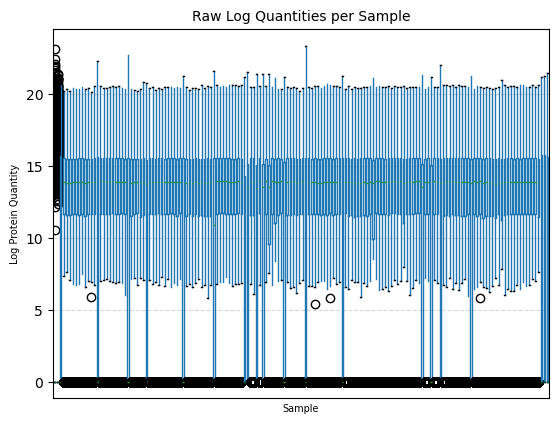

In [4]:
# Apply log transform
df_zero_imp=df.fillna(0)
df_log = np.log1p(df_zero_imp)  # log(1 + x) prevents issues with zeros

# Create the boxplot
#plt.figure(figsize=(20, 10))
df_log.boxplot()

plt.xticks([])  # Remove x-axis labels
plt.ylabel('Log Protein Quantity', fontsize=7)
plt.xlabel('Sample', fontsize=7)
plt.title('Raw Log Quantities per Sample', fontsize=10)

plt.grid(True, axis="y", linestyle="--", alpha=0.5)
plt.show()

Need to remove any outliers/blanks/qcs.

In [5]:
# Select columns that contain blanks/qcs
df_solvent_blanks = df_zero_imp.filter(like='blank')
df_kf_blanks=df_zero_imp.filter(like='BKF')
df_qcs=df_zero_imp.filter(like='R')

# Remove those columns from the original dataframe
df = df.drop(columns=df_solvent_blanks.columns)
df = df.drop(columns=df_kf_blanks.columns)
df = df.drop(columns=df_qcs.columns)

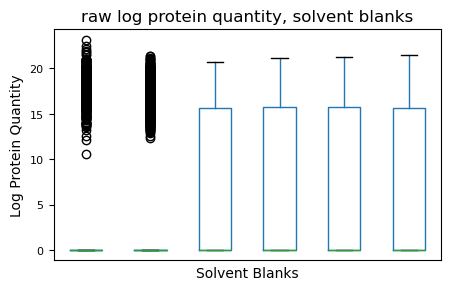

In [6]:
np.log1p(df_solvent_blanks).boxplot(fontsize=8,figsize=[5,3])
plt.xticks([])
plt.ylabel('Log Protein Quantity',fontsize=10)
plt.xlabel('Solvent Blanks',fontsize=10)
plt.title('raw log protein quantity, solvent blanks',fontsize=12)
plt.grid(False)
plt.show()

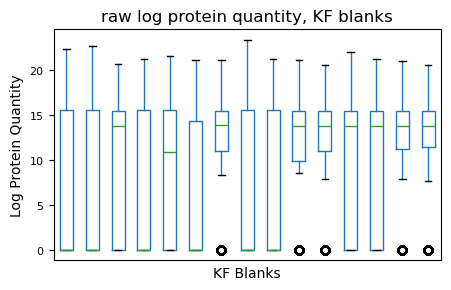

In [7]:
np.log1p(df_kf_blanks).boxplot(fontsize=8,figsize=[5,3])
plt.xticks([])
plt.ylabel('Log Protein Quantity',fontsize=10)
plt.xlabel('KF Blanks',fontsize=10)
plt.title('raw log protein quantity, KF blanks',fontsize=12)
plt.grid(False)
plt.show()

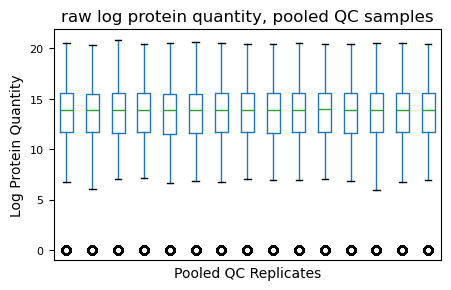

In [8]:
np.log1p(df_qcs).boxplot(fontsize=8,figsize=[5,3])
plt.xticks([])
plt.ylabel('Log Protein Quantity',fontsize=10)
plt.xlabel('Pooled QC Replicates',fontsize=10)
plt.title('raw log protein quantity, pooled QC samples',fontsize=12)
plt.grid(False)
plt.show()

In [9]:
#its clear from above we have some outliers.
#based on DIANN report
df=df.drop(columns=['P1_N8_2','P1_A9_2','P1_N6_3','P1_A4_3','P1_N2_3','P1_A2_3','P1_N1_3'])                

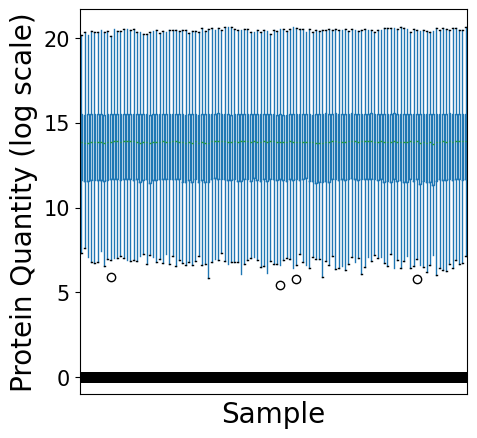

In [10]:
df_zero_impute_filtered=df.fillna(0)
np.log1p(df_zero_impute_filtered).boxplot(figsize=[5,5])
plt.xticks([])
plt.ylabel('Protein Quantity (log scale)',fontsize=20)
plt.xlabel('Sample',fontsize=20)
#plt.title('raw log quantities per sample',fontsize=30)
plt.yticks(fontsize=15)
plt.grid(False)
plt.show()
#plt.savefig('figures/1A.png', bbox_inches='tight')

In [11]:
# Create AnnData object
adata = ad.AnnData(df.T)  # Transpose to make samples as rows (observations) and proteins as columns (features)
adata.var_names = df.index  # Assign protein names
adata.obs_names = df.columns  # Assign sample names
adata.var_names_make_unique()

# Save raw counts
adata.raw = adata.copy()

# Normalize (log transform or other methods)
sc.pp.log1p(adata,base=2)  # Log-transform the data

# Store raw and processed data in layers
adata.layers["raw"] = adata.raw.X.copy()  # Keep raw data
adata.layers["log2"] = adata.X.copy()  # Store log-normalized data

/home/csmova/anaconda3/envs/hepg2_abc/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [12]:
min_pct_detected = 0.5 #set threshold to 50% 

# Calculate the minimum number of samples a protein must be detected in
min_cells = int(min_pct_detected * adata.n_obs)

# Find proteins detected (nonzero) in at least that many samples
keep_proteins = (adata.X > 0).sum(axis=0).A1 >= min_cells if hasattr(adata.X, "A1") else (adata.X > 0).sum(axis=0) >= min_cells

# Subset the AnnData object to keep only those proteins
adata = adata[:, keep_proteins]


In [13]:
keep_proteins.sum()

9518

In [14]:
len(keep_proteins)

10255

In [15]:
keep_proteins.sum()/len(keep_proteins)

0.9281326182350074

In [16]:
len(keep_proteins)-keep_proteins.sum()

737

In [17]:
raw_data = pd.DataFrame(adata.layers["raw"].copy(), index=adata.obs_names, columns=adata.var_names)
log2_data = pd.DataFrame(adata.layers["log2"].copy(), index=adata.obs_names, columns=adata.var_names)

In [18]:
log2_data

Genes,SEPTIN7,MISP3,UBXN8,SRCIN1,NSMCE2,PSMB3,UHRF1,PSMB2,MPC1,LRMDA,...,TPI1-1,U2SURP-1,UBA2-1,WDR18,DUSP12-1,MTHFD1-1,TAP2-1,SLC27A3,UBR4-1,MINDY3-1
P2_A5N4_5,20.457719,16.863618,17.964950,15.395079,17.787743,17.077984,23.411976,17.355291,20.694845,15.780286,...,18.239864,11.070832,23.569793,22.972940,13.009515,NaN,13.935395,16.772070,12.956777,15.669619
P2_N5A4_5,NaN,16.733797,17.845171,15.383245,NaN,NaN,23.362202,16.609972,20.091728,15.317487,...,15.489835,NaN,22.381951,22.803505,NaN,NaN,14.334999,16.745976,NaN,NaN
P2_N5A2_5,20.921297,17.764340,18.149261,NaN,18.354852,NaN,23.635732,17.684933,20.757778,16.274764,...,18.183335,NaN,23.848647,22.795418,13.649133,NaN,13.924877,17.263407,13.212306,16.340069
P2_N5A3_5,21.506315,16.845012,18.265899,NaN,18.061603,17.001760,23.524659,17.380630,20.827159,15.641516,...,16.769438,12.834025,23.759733,22.959745,NaN,NaN,NaN,16.561841,NaN,16.265467
P2_N8_5,20.839644,16.989650,17.924552,14.813886,17.930096,NaN,23.530779,17.984558,20.834577,16.088132,...,15.681590,11.757044,23.887923,22.904581,NaN,NaN,13.692648,17.485366,12.885788,16.000508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P1_N8_1,NaN,17.100519,18.227165,14.662157,17.978800,16.957839,23.538792,16.871785,20.795468,15.491646,...,15.575001,NaN,23.167025,22.815840,14.187429,19.556622,14.440752,17.349247,NaN,14.444517
P1_N5A3_1,20.754797,16.550036,18.350641,14.925346,17.831926,14.967578,23.547585,17.199557,20.857470,15.182577,...,15.899199,NaN,23.570673,22.869085,13.910643,19.476481,14.617066,17.114169,NaN,14.986438
P1_N9_1,21.117740,16.723234,17.979916,15.460424,18.072284,NaN,23.517336,17.216708,20.795230,15.369413,...,14.867119,NaN,23.546808,22.845234,13.454376,18.656805,14.903788,16.464533,NaN,NaN
P1_N5A2_1,20.757160,17.496050,17.969887,15.062253,17.826462,16.473742,23.666257,17.104210,20.669533,15.969764,...,15.994139,11.553269,23.719158,22.818821,14.450728,NaN,14.828112,17.012177,NaN,NaN


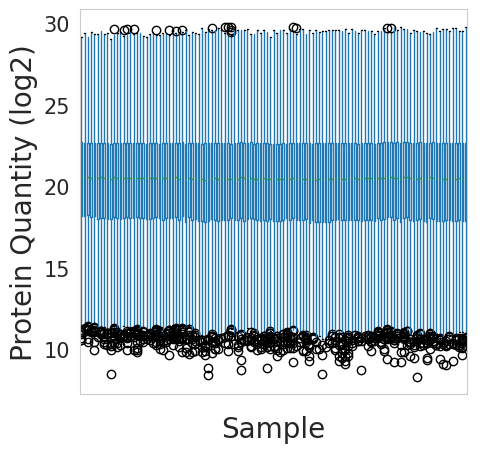

In [19]:
# Set figure size and style
plt.figure(figsize=(5, 5))  # Slightly larger for better readability
sns.set_style("whitegrid")

#looks like we got all the outliers
np.log2(raw_data.T).boxplot(fontsize=4,figsize=[5,5])
plt.xticks(color='w')
plt.ylabel('Protein Quantity (log2)',fontsize=20)
plt.xlabel('Sample',fontsize=20)
#plt.title('raw log quantities per sample',fontsize=30)
plt.yticks(fontsize=15)
plt.grid(False)
plt.show()
#plt.savefig('figures/1A.png', bbox_inches='tight')

In [20]:
# Count the number of samples in which each protein is detected (NaNs excluded by default)
protein_detection_counts = (
    adata.to_df().count(axis=0)
    .sort_values(ascending=True)
    .rename("Detected Samples")
    .to_frame())

protein_detection_counts

,Detected Samples
Genes,
ARMC6,59
ATP2B4,59
ZNF625,59
CBR3,59
ZNF852,59
...,...
TMED1,119
ADAM9,119
PDAP1,119


In [21]:
protein_detection_counts.value_counts()

Detected Samples
119                 7606
118                  249
117                  109
116                   89
115                   83
                    ... 
77                    12
79                    11
61                    11
83                    10
66                     6
Name: count, Length: 61, dtype: int64

In [22]:
7606/protein_detection_counts.value_counts().sum()

0.7991174616516075

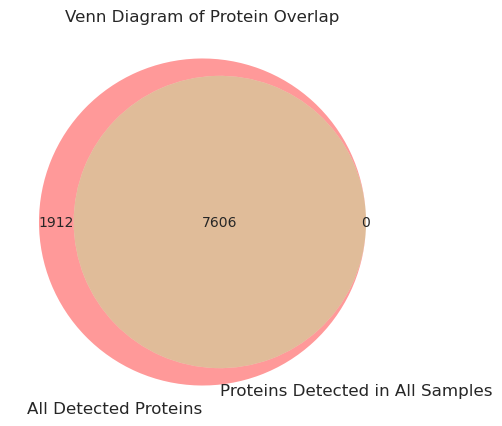

In [23]:

all_prots=protein_detection_counts.index.to_list()
prots_in_all_samples=protein_detection_counts[protein_detection_counts['Detected Samples']==119].index.to_list()

# Convert to sets
set_A = set(all_prots)
set_B = set(prots_in_all_samples)
# Convert to DataFrames with source labels
df_A = pd.DataFrame({'Gene': list(set_A), 'Source': 'All Detected Proteins'})
df_B = pd.DataFrame({'Gene': list(set_B), 'Source': 'Proteins Detected in All Samples'})

# Combine into one DataFrame
combined_df = pd.concat([df_A, df_B], ignore_index=True)


# Create the Venn diagram
plt.figure(figsize=(5, 5))
venn2([set_A, set_B], set_labels=('All Detected Proteins', 'Proteins Detected in All Samples'))
plt.title("Venn Diagram of Protein Overlap")
plt.show()

In [24]:
combined_df.to_excel('venn_all_prots_versus_all_detected.xlsx') #for figure 1c inset

In [25]:
# Count the number of proteins detected in each sample (NaNs excluded)
protein_counts_per_sample = (
    adata.to_df().count(axis=1)
    .sort_values(ascending=True)
    .rename("Detected Proteins")
    .to_frame()
)

protein_counts_per_sample

,Detected Proteins
P1_N6_1,8924
P2_N5A4_4,8931
P2_N5A2_5,8935
P2_A6_5,8980
P1_A5N1_1,8982
...,...
P1_N5A2_1,9351
P2_A1_4,9356
P1_A3_3,9358
P2_A3_4,9364


/tmp/ipykernel_82966/2287577060.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


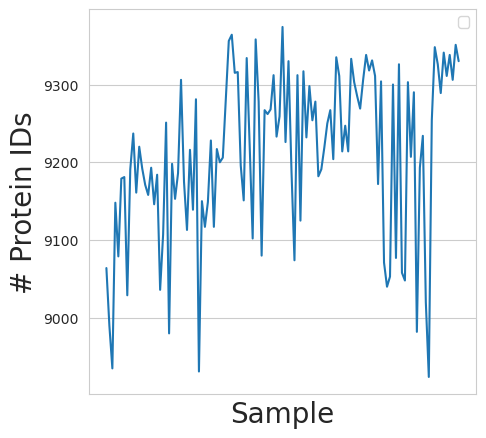

In [26]:
adata.to_df().count(axis=1).plot(figsize=[5,5])
#plt.hlines(prot_mean,0,119,colors='k', linestyles='solid', label='mean')
#plt.hlines(prot_twobelow,0,119,colors='k', linestyles='dashed', label='sd')
#plt.hlines(prot_twoabove,0,119,colors='k', linestyles='dashed', label='')

plt.ylabel('# Protein IDs', fontsize=20)
plt.xlabel('Sample',fontsize=20)
plt.xticks([])
plt.legend()
plt.show()

All samples have at least 9k prots, so no need to remove any based on this

In [27]:
twobelow = adata.to_df().T.count().mean()-2*adata.to_df().T.count().std()
twobelow

twoabove = adata.to_df().T.count().mean()+2*adata.to_df().T.count().std()
twoabove

samp_mean = adata.to_df().T.count().mean()
print(twobelow,samp_mean,twoabove)


8998.292730017356 9210.9243697479 9423.556009478443


In [28]:
adata.to_df().T.count().std()

106.31581986527142

In [29]:
def most_abundant_genes(df: pd.DataFrame, top_n: int = 10):
    """
    Finds the most abundant genes across all samples in a genes-by-cells dataframe
    and plots a horizontal barplot with error bars for standard deviations.

    Parameters:
    df (pd.DataFrame): A dataframe where rows are genes and columns are cells, with expression values.
    top_n (int): Number of top abundant genes to return.

    Returns:
    pd.Series: A series containing the top N most abundant genes and their total expression.
    """
    gene_sums = df.sum(axis=1)
    top_genes = gene_sums.nlargest(top_n).index

    top_gene_data = df.loc[top_genes]
    gene_means = top_gene_data.mean(axis=1)
    gene_stds = top_gene_data.std(axis=1)

    plt.figure(figsize=(6, 6))
    ax = sns.barplot(y=top_gene_data.index, x=gene_means.values, capsize=0.2, color="indigo", orient='h')

    # Add error bars manually
    for i, (mean, std) in enumerate(zip(gene_means, gene_stds)):
        plt.errorbar(x=mean, y=i, xerr=std, fmt='none', capsize=5, color='black')

    plt.yticks(fontsize=35)
    plt.xticks([],fontsize=35)
    plt.ylabel("Proteins", fontsize=35)
    plt.xlabel("Quantity", fontsize=35)
    plt.grid(False)
    plt.tight_layout()
    plt.show()

    return gene_sums[top_genes]


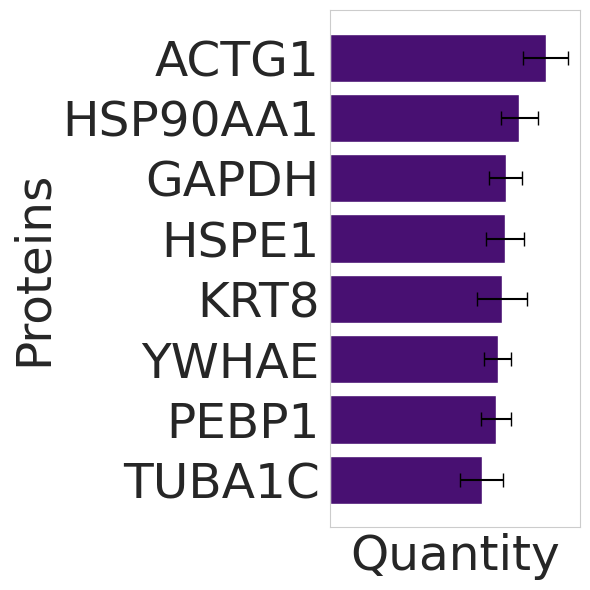

In [30]:
#get most abdundant

most_abundant_genes(raw_data.T,8);
#plt.savefig('figures/1D_inset.png', bbox_inches='tight')

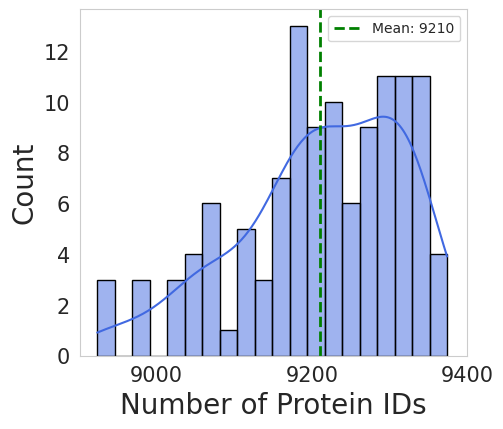

In [31]:
# Set figure size and style
plt.figure(figsize=(5, 4.5))  # Slightly larger for better readability
sns.set_style("whitegrid")

# Create histogram with better aesthetics
sns.histplot(adata.to_df().count(axis=1), bins=20, kde=True, color="royalblue", edgecolor="black")

# Compute standard deviation
prot_std = adata.to_df().count(axis=1).std()

# Add vertical line for mean with Mean ± SD in legend
plt.axvline(x=samp_mean, color='g', linestyle="dashed", linewidth=2, 
           # label=f'Mean ± SD\n{int(samp_mean)} ± {int(samp_mean)}',
            label=f'Mean: {int(samp_mean)}')


# Remove grid for cleaner look
plt.grid(False)

# Labels
plt.xlabel('Number of Protein IDs', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks([9000,9200,9400],fontsize=15)

# Add legend
plt.legend()

# Show plot
plt.show()
#plt.savefig('figures/1B.png', bbox_inches='tight')


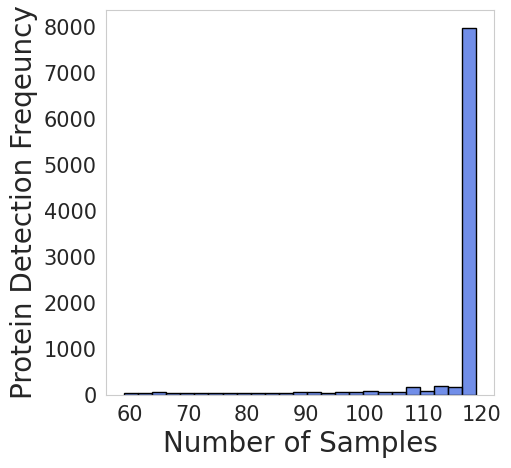

In [32]:
# Set figure size and style
plt.figure(figsize=(5, 5))  # Slightly larger for better readability
sns.set_style("whitegrid")
detection_counts = (adata.to_df().T > 0).sum(axis=1)  # Number of samples each protein is present in
sns.histplot(detection_counts, bins=25,color="royalblue", edgecolor="black")
plt.xlabel("Number of Samples",fontsize=20)
plt.ylabel("Protein Detection Freqeuncy",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(False)
#plt.savefig('figures/1c.png', bbox_inches='tight')
plt.show()

In [33]:
detection_counts.sort_values()

Genes
ARMC6        59
ATP2B4       59
ZNF625       59
CBR3         59
ZNF852       59
           ... 
TMED1       119
ADAM9       119
PDAP1       119
IFRD1       119
SLC25A30    119
Length: 9518, dtype: int64

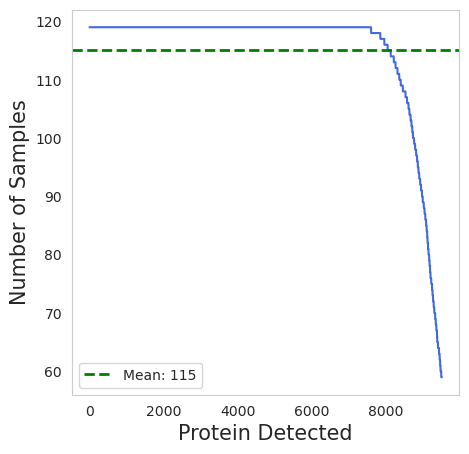

In [34]:
# Count how many cells each protein is detected in
protein_presence = (adata.to_df().T > 0).sum(axis=1)  # Number of cells where protein is detected

# Sort proteins by consistency
sorted_protein_presence = np.sort(protein_presence)[::-1]

# Set up figure style
plt.figure(figsize=(5, 5))
sns.set_style("whitegrid")
plt.grid(False)

# Line plot for ranked consistency
sns.lineplot(x=range(len(sorted_protein_presence)), y=sorted_protein_presence, color="royalblue")

# Mean detection rate
sample_mean = protein_presence.mean()
plt.axhline(sample_mean, color='green', linestyle="dashed", linewidth=2, 
            label=f'Mean: {int(sample_mean)}'
           )

# Labels and title
plt.xlabel('Protein Detected', fontsize=15)
plt.ylabel('Number of Samples', fontsize=15)

# Add legend
plt.legend()

# Show plot
plt.show()


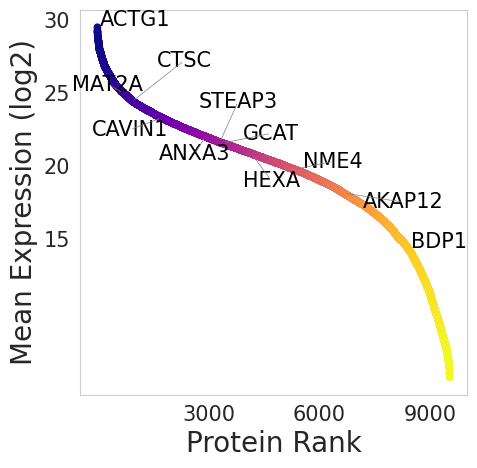

In [61]:

# Step 1: Calculate mean expression for each protein
protein_means = adata.X.mean(axis=0)

# Step 2: Sort the means in descending order and keep indices for labeling
sorted_indices = np.argsort(protein_means)[::-1]
sorted_means = protein_means[sorted_indices]

# Step 3: Match protein names for labeling
protein_names = adata.var.index  # Assuming `adata.var.index` contains protein names
sorted_protein_names = protein_names[sorted_indices]

# Define specific protein names to label
proteins_to_label = ["ACTG1", "ANXA3",'GCAT','BDP1','AKAP12','CAVIN1','MAT2A','CTSC','STEAP3','HEXA','NME4']  # Replace with actual protein names
label_indices = [i for i, name in enumerate(sorted_protein_names) if name in proteins_to_label]

# Step 4: Create a colormap based on ranks
colormap = cm.plasma  # Choose a colormap
colors = np.linspace(0, 1, len(sorted_means))  # Normalize colors for the colormap

# Step 5: Plot the sorted mean expression with a log scale
plt.figure(figsize=(5, 5))
scatter = plt.scatter(range(len(sorted_means)), sorted_means, c=colors, cmap=colormap, s=20)
#plt.yscale('log')

# Add labels for specified points with arrows
texts = []
for idx in label_indices:
    texts.append(
        plt.text(
            idx, sorted_means[idx], sorted_protein_names[idx], fontsize=15, color="k"
        )
    )

# Adjust label positions to avoid overlap, with arrows pointing to dots
adjust_text(
    texts,
    arrowprops=dict(arrowstyle="-", color="gray", lw=0.5),
    force_points=0.3,
    force_text=0.8,
    expand_points=(3, 3),
    expand_text=(3, 3),
)

# Add a color bar
#cbar = plt.colorbar(scatter)
#cbar.set_label("Rank Color Mapping", rotation=270, labelpad=20,fontsize=15)
plt.xticks([3000,6000,9000],fontsize=15)
plt.yticks([15,20,25,30],fontsize=15)
# Customize plot
plt.xlabel("Protein Rank",fontsize=20)
plt.ylabel("Mean Expression (log2)",fontsize=20)

#plt.title("Mean Protein Expression by Rank with Colormap and Non-Overlapping Labels")
plt.grid()
plt.savefig('figures/1D.png', bbox_inches='tight')
plt.show()


In [36]:
#write adata
adata.write_h5ad('./Data/adata_from_data_import')

# Clean, Normalize, Impute

In [37]:
adata=ad.read_h5ad('./Data/adata_from_data_import')

In [38]:
# Calculate % missing for each sample (observations)
adata.obs["pct_missing_samples"] = adata.to_df().isna().mean(axis=1) * 100

# Calculate % missing for each protein (features/variables)
adata.var["pct_missing_proteins"] = adata.to_df().isna().mean(axis=0) * 100

In [39]:
adata.obs["pct_missing_samples"].sort_values()

P2_A9_3      1.512923
P2_A3_4      1.617987
P1_A3_3      1.681025
P2_A1_4      1.702038
P1_N5A2_1    1.754570
               ...   
P1_A5N1_1    5.631435
P2_A6_5      5.652448
P2_N5A2_5    6.125236
P2_N5A4_4    6.167262
P1_N6_1      6.240807
Name: pct_missing_samples, Length: 119, dtype: float64

In [40]:
adata.var["pct_missing_proteins"].sort_values()

Genes
SLC25A30     0.000000
VTI1B        0.000000
SAPCD2       0.000000
TMEM135      0.000000
PRPF39       0.000000
              ...    
TRIM23      50.420168
CBR3        50.420168
ICOSLG      50.420168
ATP2B4      50.420168
PSMD6-1     50.420168
Name: pct_missing_proteins, Length: 9518, dtype: float64

In [41]:
adata.var["pct_missing_proteins"].to_list()

[8.403361344537815,
 1.680672268907563,
 0.0,
 17.647058823529413,
 26.89075630252101,
 32.773109243697476,
 0.0,
 0.8403361344537815,
 0.0,
 0.0,
 34.45378151260504,
 39.49579831932773,
 0.0,
 0.0,
 47.05882352941176,
 0.0,
 9.243697478991598,
 40.33613445378151,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 9.243697478991598,
 0.0,
 0.0,
 9.243697478991598,
 0.0,
 0.0,
 0.0,
 9.243697478991598,
 35.294117647058826,
 0.0,
 0.0,
 19.327731092436977,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 11.76470588235294,
 0.0,
 0.0,
 46.21848739495798,
 22.689075630252102,
 0.0,
 0.0,
 26.89075630252101,
 4.201680672268908,
 0.0,
 25.210084033613445,
 0.0,
 0.0,
 5.042016806722689,
 0.0,
 0.0,
 47.89915966386555,
 0.0,
 0.0,
 0.0,
 4.201680672268908,
 6.722689075630252,
 6.722689075630252,
 33.61344537815126,
 13.445378151260504,
 24.369747899159663,
 0.0,
 0.0,
 0.0,
 0.0,
 30.252100840336134,
 36.97478991596639,
 5.88235294117647,
 14.285714285714285,
 0.0,
 18.487394957983195,
 35.294117647058826,
 0.0,
 0.0

In [42]:
# redefine now that samples removed
raw_data = pd.DataFrame(adata.layers["raw"].copy(), index=adata.obs_names, columns=adata.var_names)
log2_data = pd.DataFrame(adata.layers["log2"].copy(), index=adata.obs_names, columns=adata.var_names)

# Normalize by dividing each value by the total amount of the corresponding protein
raw_protein_totals = raw_data.sum(axis=0)  # Sum across all samples (columns)
normalized_raw_data = raw_data.div(raw_protein_totals, axis=1)  # Divide each protein by its total expression
log2_protein_totals = log2_data.sum(axis=0)  # Sum across all samples (columns)
normalized_log2_data = log2_data.div(log2_protein_totals, axis=1)  # Divide each protein by its total expression

# Store in AnnData layers
adata.layers["total_norm"] = normalized_raw_data.to_numpy()
adata.layers["log2_then_total_norm"] = normalized_log2_data.to_numpy()

In [43]:
def add_normalization_layer_by_protein(adata, protein_name, layer_name="norm_by_protein"):
    """
    Adds a new layer to the AnnData object where each sample is normalized by a specific protein.
    
    Parameters:
    - adata: AnnData object
    - protein_name: The name of the protein to normalize by (must be in adata.var_names)
    - layer_name: Name of the new layer to store the normalized data
    
    Returns:
    - Updates adata with the new layer
    """
    if protein_name not in adata.var_names:
        raise ValueError(f"Protein '{protein_name}' not found in adata.var_names!")

    # Get raw data as a DataFrame
    raw_data = pd.DataFrame(adata.layers["raw"], index=adata.obs_names, columns=adata.var_names)

    # Get the reference protein expression per sample
    ref_protein_expr = raw_data[protein_name]  # Series with values per sample

    # Normalize each sample by the reference protein expression
    normalized_data = raw_data.div(ref_protein_expr, axis=0)

    # Store in AnnData layers
    adata.layers[layer_name] = normalized_data.to_numpy()

    print(f"New layer '{layer_name}' added to AnnData, normalized by {protein_name}.")

# Example usage:
add_normalization_layer_by_protein(adata, "ACTG1", layer_name="norm_by_ACTG1")

New layer 'norm_by_ACTG1' added to AnnData, normalized by ACTG1.


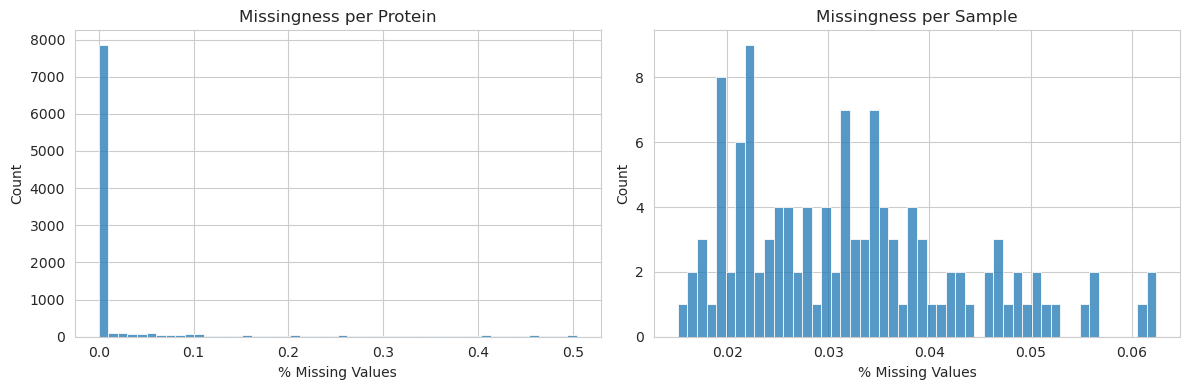

In [44]:

# Create a DataFrame of missing values
missing_df = pd.DataFrame(np.isnan(adata.X), columns=adata.var_names, index=adata.obs_names)

# % of missing per protein
protein_missingness = missing_df.mean(axis=0)
# % of missing per sample
sample_missingness = missing_df.mean(axis=1)

# Plot
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(protein_missingness, bins=50, ax=axs[0])
axs[0].set_title('Missingness per Protein')
axs[0].set_xlabel('% Missing Values')

sns.histplot(sample_missingness, bins=50, ax=axs[1])
axs[1].set_title('Missingness per Sample')
axs[1].set_xlabel('% Missing Values')
plt.tight_layout()
plt.show()


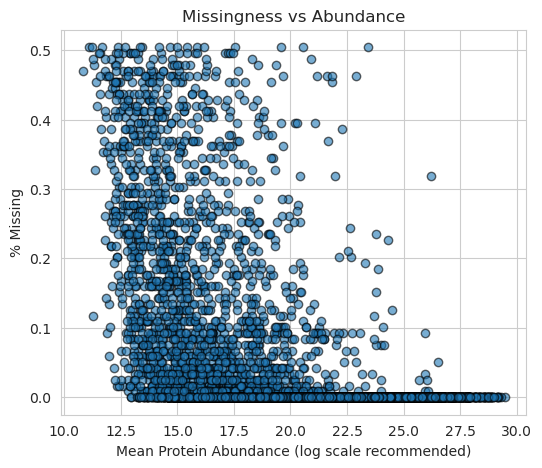

In [45]:
# Calculate mean abundance for each protein (ignoring nan)
protein_means = np.nanmean(adata.X, axis=0)

# Scatter plot: mean abundance vs missingness
plt.figure(figsize=(6, 5))
plt.scatter(protein_means, protein_missingness, alpha=0.6, edgecolors='k')
plt.xlabel('Mean Protein Abundance (log scale recommended)')
plt.ylabel('% Missing')
plt.title('Missingness vs Abundance')
plt.grid(True)
plt.show()


In [46]:
def add_knn_imputed_layer_from_log2_total_norm(adata, n_neighbors=5, layer_name="knn_imputed"):
    """
    Adds a new layer to the AnnData object with missing values imputed using KNN.
    
    Parameters:
    - adata: AnnData object
    - n_neighbors: Number of nearest neighbors to use for imputation
    - layer_name: Name of the new layer to store the imputed data
    
    Returns:
    - Updates adata with the new layer
    """
    # Extract raw data
    norm_data = pd.DataFrame(adata.layers["log2_then_total_norm"], index=adata.obs_names, columns=adata.var_names)

    # Identify proteins that are completely missing (columns full of NaNs)
    missing_proteins = norm_data.columns[norm_data.isna().all(axis=0)].tolist()

    if missing_proteins:
        print(f"Warning: {len(missing_proteins)} proteins are completely missing and will be kept as NaN.")

    # Initialize KNN imputer
    imputer = KNNImputer(n_neighbors=n_neighbors)

    # Perform imputation on non-fully-missing proteins
    non_missing_data = norm_data.drop(columns=missing_proteins)  # Drop fully missing proteins before imputation
    imputed_array = imputer.fit_transform(non_missing_data)  # Impute

    # Convert back to DataFrame
    imputed_data = pd.DataFrame(imputed_array, index=adata.obs_names, columns=non_missing_data.columns)

    # Reinsert completely missing proteins as NaN
    for protein in missing_proteins:
        imputed_data[protein] = np.nan  # Keep as NaN since imputation was not possible

    # Ensure column order matches original `adata.var_names`
    imputed_data = imputed_data[adata.var_names]

    # Store imputed data in a new layer
    adata.layers[layer_name] = imputed_data.to_numpy()

    print(f"New layer '{layer_name}' added to AnnData with KNN-imputed values.")


In [47]:
#do imputation using normalized data 
add_knn_imputed_layer_from_log2_total_norm(adata, n_neighbors=5, layer_name="knn_imputed_from_log2_total_norm")

New layer 'knn_imputed_from_log2_total_norm' added to AnnData with KNN-imputed values.


In [48]:
#multiply by 10e6
adata.layers["knn_imputed_from_log2_total_norm_10e6"] = 10e6*pd.DataFrame(adata.layers["knn_imputed_from_log2_total_norm"], index=adata.obs_names, columns=adata.var_names)

In [49]:
#replace all nans with 0
for i in adata.layers:
    print(i)
    imputed_data = pd.DataFrame(adata.layers[str(i)], index=adata.obs_names, columns=adata.var_names)
    
    # Replace any remaining NaNs with 0
    imputed_data.fillna(0, inplace=True)
    
    # Store the updated imputed data back in the layer
    adata.layers[str(i)] = imputed_data.to_numpy()

log2
raw
total_norm
log2_then_total_norm
norm_by_ACTG1
knn_imputed_from_log2_total_norm
knn_imputed_from_log2_total_norm_10e6


In [50]:
#write
adata.write_h5ad('./Data/adata_after_impute')

# Metadata

In [51]:
#write
adata=ad.read_h5ad('./Data/adata_after_impute')

In [52]:
#helper functions to annotate the data

def extract_A_N_sum(col_name):
    A_match = re.search(r'A(\d+)', col_name)
    N_match = re.search(r'N(\d+)', col_name)
    
    A_val = int(A_match.group(1)) if A_match else 0
    N_val = int(N_match.group(1)) if N_match else 0
    
    return A_val + N_val


def classify_A_N_order(col_name):
    A_index = col_name.find('A')
    N_index = col_name.find('N')
    
    if A_index != -1 and N_index != -1:  # Both A and N exist
        return "AN" if A_index < N_index else "NA"
    elif A_index != -1:
        return "A"
    elif N_index != -1:
        return "N"
    else:
        return "None"  # Shouldn't happen given column names


In [53]:
df=adata.to_df()

# Extract info from column names
df['plate'] = df.index.str.extract(r'(P\d)')[0].to_list()
df['replicate'] = df.index.str[-1].to_list()
df['passage'] = df.index.map(extract_A_N_sum)
df['condition'] = df.index.map(classify_A_N_order)
# Create AnnData object

# Store extracted values in obs
adata.obs['plate'] = df['plate'].values  
adata.obs['replicate'] = df['replicate'].values  
adata.obs['passage'] = df['passage'].values  
adata.obs['condition'] = df['condition'].values

# Print AnnData structure
print(adata)


AnnData object with n_obs × n_vars = 119 × 9518
    obs: 'pct_missing_samples', 'plate', 'replicate', 'passage', 'condition'
    var: 'pct_missing_proteins'
    uns: 'log1p'
    layers: 'knn_imputed_from_log2_total_norm', 'knn_imputed_from_log2_total_norm_10e6', 'log2', 'log2_then_total_norm', 'norm_by_ACTG1', 'raw', 'total_norm'


In [54]:
adata.obs

,pct_missing_samples,plate,replicate,passage,condition
P2_A5N4_5,4.769910,P2,5,9,AN
P2_N5A4_5,5.547384,P2,5,9,NA
P2_N5A2_5,6.125236,P2,5,7,NA
P2_N5A3_5,3.887371,P2,5,8,NA
P2_N8_5,4.612314,P2,5,8,N
...,...,...,...,...,...
P1_N8_1,2.174827,P1,1,8,N
P1_N5A3_1,1.891154,P1,1,8,NA
P1_N9_1,2.227359,P1,1,9,N
P1_N5A2_1,1.754570,P1,1,7,NA


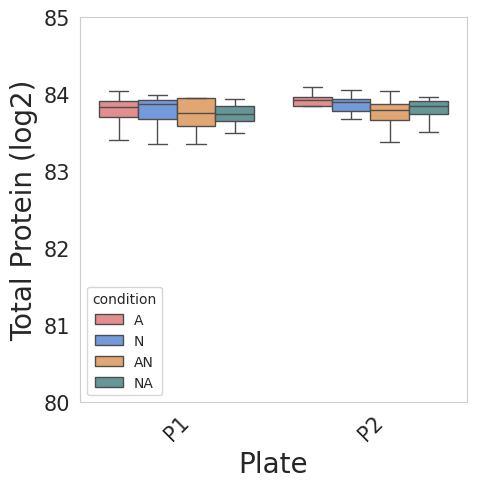

In [55]:

# Extract total protein content per sample
total_protein = adata.layers['knn_imputed_from_log2_total_norm'].sum(axis=1)  # Summing protein intensities per sample

# Convert to DataFrame and merge with metadata
df = adata.obs.copy()
df["Total_Protein"] = total_protein

# Convert passage to categorical for correct ordering
df["plate"] = pd.Categorical(df["plate"], ordered=True);

# Set figure size
plt.figure(figsize=(5, 5));

# Create box plots with error bars;
df["condition"] = pd.Categorical(df["condition"], categories=["A", "N", "AN", "NA"], ordered=True);

palette = {"A": "lightcoral", "N": "cornflowerblue", "AN": "sandybrown", "NA": "cadetblue"};

sns.boxplot(data=df, x="plate", y="Total_Protein", hue="condition", showfliers=False, palette=palette);

# Labels and formatting
plt.xlabel("Plate", fontsize=20);
plt.ylabel("Total Protein (log2)", fontsize=20);
y_min, y_max = df["Total_Protein"].min(), df["Total_Protein"].max();
plt.ylim([80,85]);

#plt.ylim(y_min - .1 * (y_max - y_min), y_max + .1 * (y_max - y_min))
plt.xticks(fontsize=15, rotation=45);
plt.yticks(fontsize=15);
plt.grid(False);

# Extract legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels();
#ax.legend().remove()  # Remove legend from main plot

# Show main plot without legend
plt.show();

# Create separate figure for legend
#fig_legend = plt.figure(figsize=(3, 2));
#ax_legend = fig_legend.add_subplot(111)
#ax_legend.legend(handles, labels, title="Condition", loc="center", frameon=False);
#ax_legend.axis("off");

# Show legend separately
#plt.show();


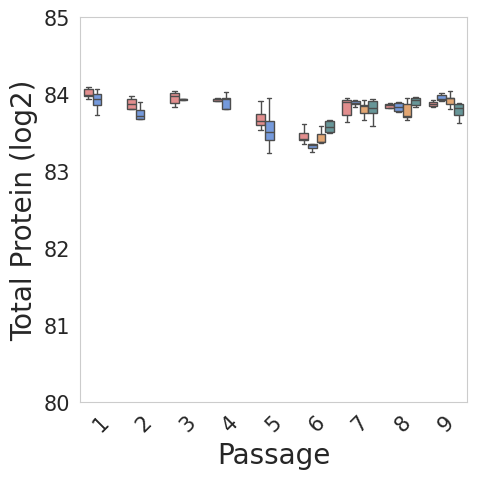

In [56]:
# Extract total protein content per sample
total_protein = adata.layers['knn_imputed_from_log2_total_norm'].sum(axis=1)  # Summing protein intensities per sample

# Convert to DataFrame and merge with metadata
df = adata.obs.copy()
df["Total_Protein"] = total_protein

# Convert passage to categorical for correct ordering
df["passage"] = pd.Categorical(df["passage"], ordered=True)
df["condition"] = pd.Categorical(df["condition"], categories=["A", "N", "AN", "NA"], ordered=True)

# Set figure size
plt.figure(figsize=(5, 5))

# Create box plots with error bars
sns.boxplot(data=df, x="passage", y="Total_Protein", hue="condition", showfliers=False,palette=palette,legend=False)
#sns.pointplot(data=df, x="passage", y="Total_Protein", hue="condition",
#              dodge=True, markers="o", ci="sd", errorbar="sd", linestyles="none")

# Labels and formatting
plt.xlabel("Passage", fontsize=20)
plt.ylabel("Total Protein (log2)", fontsize=20)
y_min, y_max = df["Total_Protein"].min(), df["Total_Protein"].max()
#plt.ylim(y_min - .1 * (y_max - y_min), y_max + .1 * (y_max - y_min))
#plt.ylim([83.2,84.1])
plt.ylim([80,85])

#plt.title("Total Protein Content Across Passages and Conditions", fontsize=16)
#plt.legend(title="Condition")
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)
plt.grid(False)
plt.show()


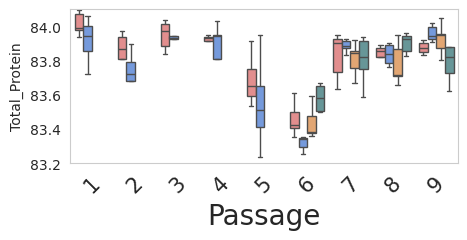

In [57]:
# Extract total protein content per sample
total_protein = adata.layers['knn_imputed_from_log2_total_norm'].sum(axis=1)  # Summing protein intensities per sample

# Convert to DataFrame and merge with metadata
df = adata.obs.copy()
df["Total_Protein"] = total_protein

# Convert passage to categorical for correct ordering
df["passage"] = pd.Categorical(df["passage"], ordered=True)
df["condition"] = pd.Categorical(df["condition"], categories=["A", "N", "AN", "NA"], ordered=True)

# Set figure size
plt.figure(figsize=(5, 2))

# Create box plots with error bars
sns.boxplot(data=df, x="passage", y="Total_Protein", hue="condition", showfliers=False,palette=palette,legend=False)
#sns.pointplot(data=df, x="passage", y="Total_Protein", hue="condition",
#              dodge=True, markers="o", ci="sd", errorbar="sd", linestyles="none")

# Labels and formatting
plt.xlabel("Passage", fontsize=20)
#plt.ylabel("Total Protein (log2)", fontsize=20)
y_min, y_max = df["Total_Protein"].min(), df["Total_Protein"].max()
#plt.ylim(y_min - .1 * (y_max - y_min), y_max + .1 * (y_max - y_min))
#plt.ylim([83.2,84.1])
plt.ylim([83.2,84.1])

#plt.title("Total Protein Content Across Passages and Conditions", fontsize=16)
#plt.legend(title="Condition")
plt.xticks(fontsize=15,rotation=45)
#plt.yticks(fontsize=15)
plt.grid(False)
plt.show()


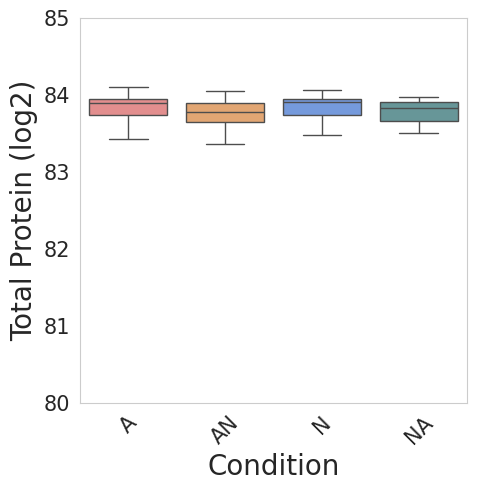

In [58]:
# Extract total protein content per sample
total_protein = adata.layers['knn_imputed_from_log2_total_norm'].sum(axis=1)  # Summing protein intensities per sample

# Convert to DataFrame and merge with metadata
df = adata.obs.copy()
df["Total_Protein"] = total_protein

# Convert passage to categorical for correct ordering
df["condition"] = pd.Categorical(df["condition"], ordered=True)

# Set figure size
plt.figure(figsize=(5, 5))

# Create box plots with error bars
sns.boxplot(data=df, x="condition", y="Total_Protein", hue="condition", showfliers=False,palette=palette)
#sns.pointplot(data=df, x="passage", y="Total_Protein", hue="condition",
#              dodge=True, markers="o", ci="sd", errorbar="sd", linestyles="none")

# Labels and formatting
plt.xlabel("Condition", fontsize=20)
plt.ylabel("Total Protein (log2)", fontsize=20)
y_min, y_max = df["Total_Protein"].min(), df["Total_Protein"].max()
#plt.ylim(y_min - .1 * (y_max - y_min), y_max + .1 * (y_max - y_min))
plt.ylim([80,85])

#plt.title("Total Protein Content Across Passages and Conditions", fontsize=16)
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)
plt.grid(False)
plt.show()


In [59]:
adata.X = np.nan_to_num(adata.X, nan=0)

In [60]:
adata.write_h5ad('./Data/adata_with_metadata')